In [58]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [59]:
df_all = pd.read_csv('../Processed Data/AllPlayerDataProcessed.csv')
df_gk = pd.read_csv('../Processed Data/GKDataProcessed.csv')
df_bk = pd.read_csv('../Processed Data/BKDataProcessed.csv')
df_md = pd.read_csv('../Processed Data/MDDataProcessed.csv')
df_fwd = pd.read_csv('../Processed Data/FWDDataProcessed.csv')
df = df_all.drop(columns=['Index','Position'])
df.head()

,Age,Overall,Weak Foot,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,4.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,4.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,5.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,3.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,5.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [60]:
#Shape of dataframe
print(" Shape of dataframe: ", df.shape)

 Shape of dataframe:  (18147, 37)


In [61]:
#Variable inspection

print("Names of columns ", list(df.columns))

Names of columns  ['Age', 'Overall', 'Weak Foot', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']


In [62]:
#Split Overall as a Target value
df_model = df
target = df_model.Overall
df_model2 = df_model.drop(['Overall'], axis = 1)

#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_model2, target, test_size=0.2)

In [63]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score 

print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))
#print('Accurancy '+str(accuracy_score(y_test ,predictions)))
#print (accuracy_score (y_test ,predictions))

r2 score: 0.8542352354985783
RMSE : 2.639561390357564


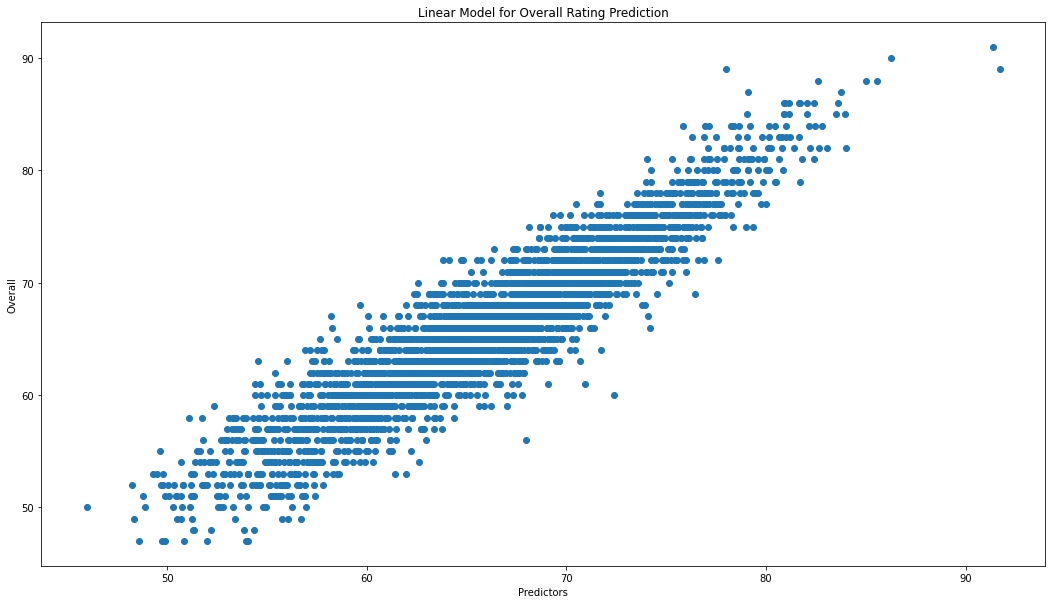

In [64]:
plt.figure(figsize=(18,10))
plt.scatter(predictions, y_test)
plt.xlabel("Predictors")
plt.ylabel('Overall')
plt.title("Linear Model for Overall Rating Prediction")
plt.show()

[ 0.02899984  0.11736276  0.01240777  0.02752686  0.08930703  0.08787722
 -0.00226329  0.02348     0.01171626  0.006371   -0.01860022  0.14574275
  0.03410845  0.03175549 -0.0027222   0.28637685 -0.02197049  0.02428363
  0.00598453  0.01126576  0.03172426 -0.0208921  -0.00179752 -0.00725545
 -0.05444071 -0.01568016  0.00144371  0.11656772  0.03541675  0.02907663
 -0.02005756  0.07294844  0.07767969  0.03727129  0.06241072  0.07767309]


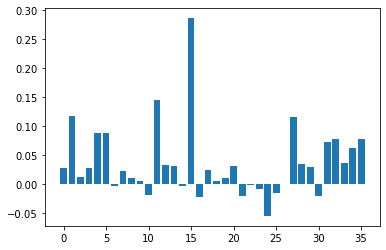

In [65]:
Y = model.coef_
X = range(len(Y))
plt.bar(X,Y)
print(Y)

In [66]:
from sklearn.neighbors import KNeighborsRegressor
K = 5
model = KNeighborsRegressor(n_neighbors=K)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [67]:
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.93249457527344
RMSE : 1.7962832763279366


In [68]:
print('Predicted weights: %s' % predictions)
print('Actual weights: %s' % y_test)

Predicted weights: [60.  69.4 49.2 ... 63.2 70.2 68.2]
Actual weights: 15597    59
3376     72
18110    48
4509     71
17289    54
4779     70
15575    59
1571     75
4400     71
10074    65
1811     75
15561    59
6442     69
8439     67
9146     66
17202    55
7052     68
15662    59
3748     72
6173     69
1111     77
16354    57
6408     69
12227    63
3721     72
16779    56
830      78
11701    64
16434    57
9819     66
         ..
14142    61
16959    56
2511     74
12560    63
17117    55
3226     72
4015     71
762      78
1574     75
16603    57
13911    61
10679    65
4123     71
978      77
586      79
15880    58
18004    50
16566    57
4295     71
4082     71
4774     70
2235     74
195      83
10372    65
16309    57
15352    59
12720    63
12973    63
4625     71
6544     69
Name: Overall, Length: 3630, dtype: int64


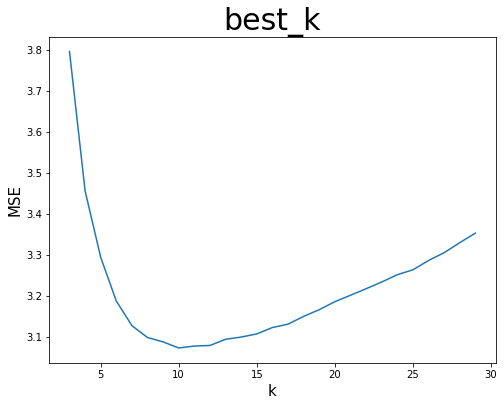

In [69]:
from sklearn.model_selection import GridSearchCV
score_list = []
param_test = {'n_neighbors': np.arange(3, 30, 1)}
Gs = GridSearchCV(estimator=KNeighborsRegressor(weights='uniform'),
                  param_grid=param_test, scoring='neg_mean_squared_error', cv=5)  
Gs.fit(X_train, y_train)
score_list = -Gs.cv_results_['mean_test_score']  # 取反,损失是负数
plt.figure(figsize=[8, 6])
plt.plot(range(3, 30, 1), score_list)
plt.xlabel("k", fontsize=15)
plt.ylabel("MSE", fontsize=15)
plt.title("best_k", fontsize=30)
plt.show()

In [70]:
Gs.best_estimator_
Gs.best_score_
Gs.best_params_

{'n_neighbors': 10}

In [71]:
K = Gs.best_params_['n_neighbors']
model = KNeighborsRegressor(n_neighbors=K, weights='uniform')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.9377269217422249
RMSE : 1.72526438266216


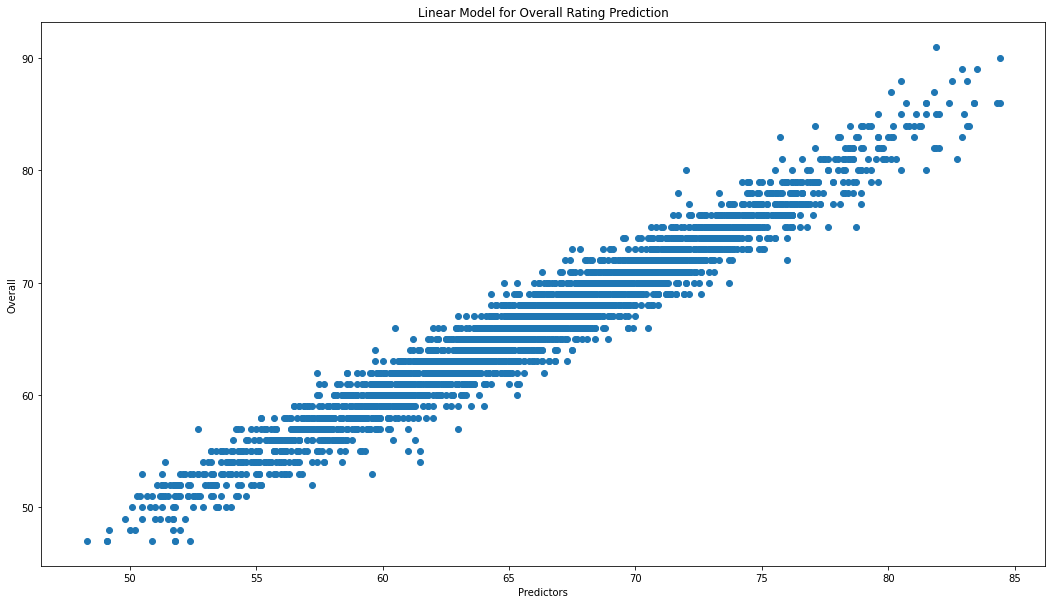

In [72]:
plt.figure(figsize=(18,10))
plt.scatter(predictions, y_test)
plt.xlabel("Predictors")
plt.ylabel('Overall')
plt.title("Linear Model for Overall Rating Prediction")
plt.show()